<a href="https://colab.research.google.com/github/mkjubran/ENCS5398/blob/master/DCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow

In [7]:
# Zigzag scan of a matrix
# Argument is a two-dimensional matrix of any size,
# not strictly a square one.
# Function returns a 1-by-(m*n) array,
# where m and n are sizes of an input matrix,
# consisting of its items scanned by a zigzag method.
#
# Matlab Code:
# Alexey S. Sokolov a.k.a. nICKEL, Moscow, Russia
# June 2007
# alex.nickel@gmail.com

def zigzag(input):
    #initializing the variables
    #----------------------------------
    h = 0
    v = 0

    vmin = 0
    hmin = 0

    vmax = input.shape[0]
    hmax = input.shape[1]
    
    #print(vmax ,hmax )

    i = 0

    output = np.zeros(( vmax * hmax))
    #----------------------------------

    while ((v < vmax) and (h < hmax)):
    	
        if ((h + v) % 2) == 0:                 # going up
            
            if (v == vmin):
            	#print(1)
                output[i] = input[v, h]        # if we got to the first line

                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1                        

                i = i + 1

            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
            	#print(2)
            	output[i] = input[v, h] 
            	v = v + 1
            	i = i + 1

            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
            	#print(3)
            	output[i] = input[v, h] 
            	v = v - 1
            	h = h + 1
            	i = i + 1

        
        else:                                    # going down

        	if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
        		#print(4)
        		output[i] = input[v, h] 
        		h = h + 1
        		i = i + 1
        
        	elif (h == hmin):                  # if we got to the first column
        		#print(5)
        		output[i] = input[v, h] 

        		if (v == vmax -1):
        			h = h + 1
        		else:
        			v = v + 1

        		i = i + 1

        	elif ((v < vmax -1) and (h > hmin)):     # all other cases
        		#print(6)
        		output[i] = input[v, h] 
        		v = v + 1
        		h = h - 1
        		i = i + 1




        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
        	#print(7)        	
        	output[i] = input[v, h] 
        	break

    #print ('v:',v,', h:',h,', i:',i)
    return output




# Inverse zigzag scan of a matrix
# Arguments are: a 1-by-m*n array, 
# where m & n are vertical & horizontal sizes of an output matrix.
# Function returns a two-dimensional matrix of defined sizes,
# consisting of input array items gathered by a zigzag method.
#
# Matlab Code:
# Alexey S. Sokolov a.k.a. nICKEL, Moscow, Russia
# June 2007
# alex.nickel@gmail.com


def inverse_zigzag(input, vmax, hmax):
	
	#print input.shape

	# initializing the variables
	#----------------------------------
	h = 0
	v = 0

	vmin = 0
	hmin = 0

	output = np.zeros((vmax, hmax))

	i = 0
    #----------------------------------

	while ((v < vmax) and (h < hmax)): 
		#print ('v:',v,', h:',h,', i:',i)   	
		if ((h + v) % 2) == 0:                 # going up
            
			if (v == vmin):
				#print(1)
				
				output[v, h] = input[i]        # if we got to the first line

				if (h == hmax):
					v = v + 1
				else:
					h = h + 1                        

				i = i + 1

			elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
				#print(2)
				output[v, h] = input[i] 
				v = v + 1
				i = i + 1

			elif ((v > vmin) and (h < hmax -1 )):    # all other cases
				#print(3)
				output[v, h] = input[i] 
				v = v - 1
				h = h + 1
				i = i + 1

        
		else:                                    # going down

			if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
				#print(4)
				output[v, h] = input[i] 
				h = h + 1
				i = i + 1
        
			elif (h == hmin):                  # if we got to the first column
				#print(5)
				output[v, h] = input[i] 
				if (v == vmax -1):
					h = h + 1
				else:
					v = v + 1
				i = i + 1
        		        		
			elif((v < vmax -1) and (h > hmin)):     # all other cases
				output[v, h] = input[i] 
				v = v + 1
				h = h - 1
				i = i + 1




		if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
			#print(7)        	
			output[v, h] = input[i] 
			break


	return output

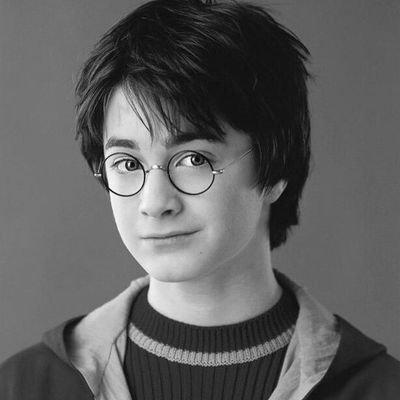

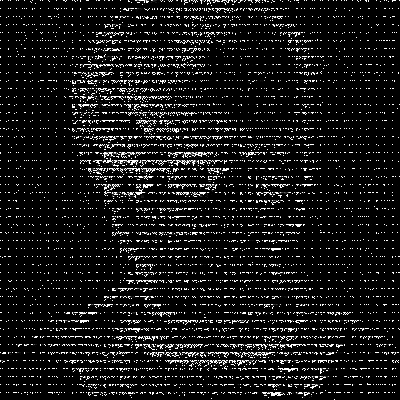

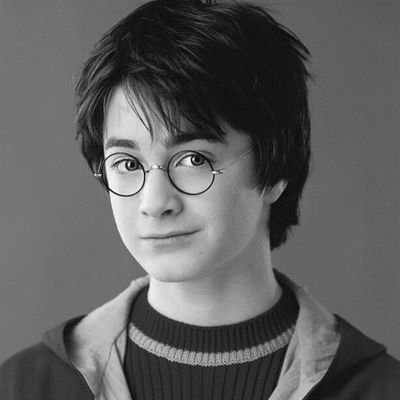

MSE = 11514.477338188217
PSNR = 7.518361314892752


In [55]:
def get_run_length_encoding(image):
    i = 0
    skip = 0
    stream = []    
    bitstream = ""
    image = image.astype(int)
    while i < image.shape[0]:
        if image[i] != 0:            
            stream.append((image[i],skip))
            bitstream = bitstream + str(image[i])+ " " +str(skip)+ " "
            skip = 0
        else:
            skip = skip + 1
        i = i + 1

    return bitstream

# defining block size
block_size = 8

# Quantization Matrix 
#QUANTIZATION_MAT = np.array([[16,11,10,16,24,40,51,61],[12,12,14,19,26,58,60,55],[14,13,16,24,40,57,69,56 ],[14,17,22,29,51,87,80,62],[18,22,37,56,68,109,103,77],[24,35,55,64,81,104,113,92],[49,64,78,87,103,121,120,101],[72,92,95,98,112,100,103,99]])

QUANTIZATION_MAT = np.array([[1,1,1,1,1,1,1,11],[1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1 ],[1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1]])

# reading image in grayscale style
img = cv2.imread('harry.jpg', cv2.IMREAD_GRAYSCALE)

#You can try with this matrix to understand working of DCT
#img = np.array([[255,255,227,204,204,203,192,217],[215,189,167,166,160,135,167,244],[169,115,99,99,99,82,127,220],[146,90,86,88,84,63,195,189],[255,255,231,239,240,182,251,232],[255,255,21,245,226,169,229,247],[255,255,222,251,174,209,174,163],[255,255,221,184,205,248,249,220]])


# get size of the image
[h , w] = img.shape



# No of blocks needed : Calculation

height = h
width = w
h = np.float32(h) 
w = np.float32(w) 

nbh = math.ceil(h/block_size)
nbh = np.int32(nbh)

nbw = math.ceil(w/block_size)
nbw = np.int32(nbw)


# Pad the image, because sometime image size is not dividable to block size
# get the size of padded image by multiplying block size by number of blocks in height/width

# height of padded image
H =  block_size * nbh

# width of padded image
W =  block_size * nbw

# create a numpy zero matrix with size of H,W
padded_img = np.zeros((H,W))
orig_img = np.zeros((H,W))

# copy the values of img into padded_img[0:h,0:w]
# for i in range(height):
#         for j in range(width):
#                 pixel = img[i,j]
#                 padded_img[i,j] = pixel

# or this other way here
padded_img[0:height,0:width] = img[0:height,0:width]

cv2.imwrite('uncompressed.bmp', np.uint8(padded_img))
cv2_imshow(np.uint16(padded_img))

cv2.imwrite('uncompressed.bmp', np.uint8(orig_img))

# divide image into block size by block size (here: 8-by-8) blocks
# To each block apply 2D discrete cosine transform
# reorder DCT coefficients in zig-zag order
# reshaped it back to block size by block size (here: 8-by-8)

# initialisation of compressed image
recomp_img = np.zeros((H,W))

for i in range(nbh):
    
        # Compute start and end row index of the block
        row_ind_1 = i*block_size                
        row_ind_2 = row_ind_1+block_size
        
        for j in range(nbw):
            
            # Compute start & end column index of the block
            col_ind_1 = j*block_size                       
            col_ind_2 = col_ind_1+block_size
                        
            block = padded_img[ row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2 ]
                       
            # apply 2D discrete cosine transform to the selected block                       
            DCT = cv2.dct(block)            

            #DCT_normalized = cv2.idct(DCT).astype(int) ; # without Quantization
            DCT_normalized = np.divide(DCT,QUANTIZATION_MAT).astype(int) # with Quantization       
           
            # reorder DCT coefficients in zig zag order by calling zigzag function
            # it will give you a one dimentional array
            reordered = zigzag(DCT_normalized)

            # reshape the reorderd array back to (block size by block size) (here: 8-by-8)
            reshaped= np.reshape(reordered, (block_size, block_size)) 
            
            # copy reshaped matrix into padded_img on current block corresponding indices
            padded_img[row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2] = reshaped

            block = inverse_zigzag(reshaped.flatten(), int(block_size),int(block_size))            
            de_quantized = np.multiply(block,QUANTIZATION_MAT)                
            recomp_img[row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2] = cv2.idct(de_quantized) 


cv2_imshow(np.uint16(padded_img))

cv2_imshow(np.uint16(recomp_img))



# clamping to  8-bit max-min values
recomp_img[recomp_img > 255] = 255
recomp_img[recomp_img < 0] = 0

MSE=np.sum(np.sum(np.power(orig_img-recomp_img,2)))/(W*H);
PSNR=10*math.log10(255**2/MSE)

print('MSE = {}'.format(MSE))
print('PSNR = {}'.format(PSNR))

cv2.waitKey(0)
cv2.destroyAllWindows()